# Clustering by density

In [1]:
import numpy as np

from support import ClusteredDataset, Colors

import matplotlib.pyplot as plt
%matplotlib inline

A point in the dataset creates a cluster when there are at least 'min_points' within a certain 'radius'

In [2]:
class DenseClustering:
    def __distances(self,X,clusters,i):
        output = []
        for c in clusters:
            cPoints = X[c]
            
            value = float('Inf')
            for point in X[clusters[i]]:
                dst = np.linalg.norm(cPoints-point, axis=-1).min()
                value = min(value, dst)
            
            output.append( value )
        return np.array(output)
    
    def FitPredict(self, X, min_points = 3, radius=0.5):
        clusters = [[i] for i in range(X.shape[0])]
        
        skip = 0
        while skip < len(clusters):
            
            dst = self.__distances(X,clusters,skip)
            candidates = np.argwhere(dst < radius)[:,0]
            
            if len(candidates) < min_points:
                skip += 1
                continue
            
            skip = 0
            new_cluster = []
            candidates = reversed(sorted(candidates))
            
            for idx in candidates:
                new_cluster += clusters.pop(idx)
                
            clusters.append(new_cluster)
            
        print(skip, clusters)
        
        labels = [-1] * X.shape[0]
        label_id = 0
        for c in clusters:
            if len(c) < min_points:
                continue
                
            for i in c:
                labels[i] = label_id
            label_id += 1
                     
        return np.array(labels)

In [3]:
groups = (
    (20, [40,0]),
    (15, [ 45,0]),
    ( 3, [ 43,5])
)

min_points = 4
radius = 0.5

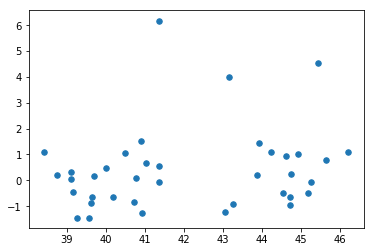

In [4]:
X,_ = ClusteredDataset(*groups)

#X = np.vstack( (GenerateSet(type_a_points, [-2,0]), generate_set(type_b_points,[2,0])) ) 
#y = np.array(([0]*type_a_points) + ([1]*type_b_points))
plt.scatter(X[:,0], X[:,1], s=30)
plt.show()

6 [[35], [36], [37], [18, 17, 7, 5, 3, 16, 4, 19, 8, 6, 1, 0, 15, 13, 12, 10, 9, 2, 11, 14], [23, 22], [30, 25, 21, 20, 34, 32, 27, 26, 33, 29, 28, 24, 31]]


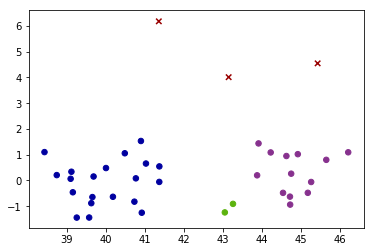

In [6]:
dc = DenseClustering()
y = dc.FitPredict(X, min_points=2, radius=1)

outliers = (y == -1)
core = (y != -1)

plt.scatter(X[core,0], X[core,1], s=30, c=Colors(y[core]))
plt.scatter(X[outliers,0], X[outliers,1], s=30, marker='x', c=Colors(y[outliers]))
plt.show()